# Cluster analysis

## Task

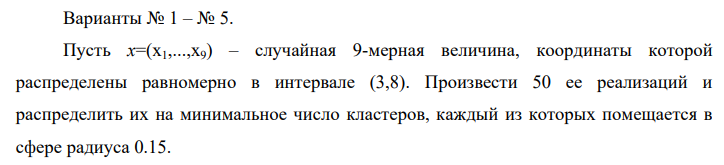

## Init

### Imports & Constants

In [113]:
import numpy as np
import matplotlib.pyplot as plt

LEN_POINTS_GROUP = 9
LEN_DATA = 50
LEN_POINTS = LEN_DATA * LEN_POINTS_GROUP
POINT_COORDINATE_MIN_VALUE = 3
POINT_COORDINATE_MAX_VALUE = 8
CLUSTER_MAX_RADIUS = 0.15

### Values genarate

In [114]:
P = np.array([[set() for j in range(LEN_POINTS_GROUP)]
                for i in range(LEN_DATA)])
for i in range(LEN_DATA):
    for j in range(LEN_POINTS_GROUP):
        x = np.random.uniform(POINT_COORDINATE_MIN_VALUE,
                                POINT_COORDINATE_MAX_VALUE)
        y = np.random.uniform(POINT_COORDINATE_MIN_VALUE,
                                POINT_COORDINATE_MAX_VALUE)
        P[i, j] = (x, y)

P_FULL = P.reshape(LEN_POINTS)


### Raw plot

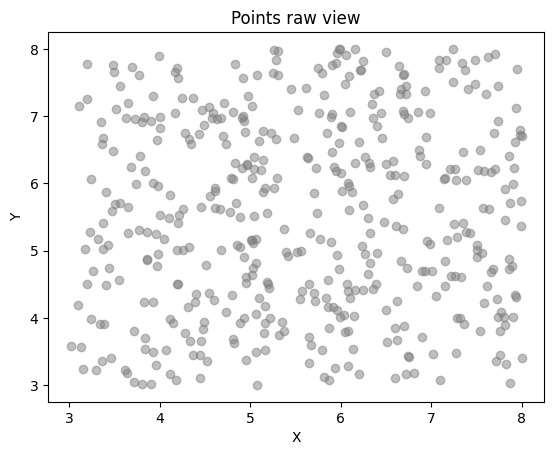

In [115]:
for p in P_FULL:
    plt.scatter(p[0], p[1], c='gray', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points raw view')
plt.show()

## Clusters calculations

### Class

In [116]:
class Cluster2D:

    def __init__(self, maxDeviation: float = 0, centroid: set = None, points: list = []):
        self.Centroid = centroid
        self.PreviousCentroid = centroid
        self.MaxDeviation = maxDeviation
        self.Points = list(points)

    def AddPoint(self, point: set):
        if (self.Centroid is None):
            self.Centroid = point
            return
        md = self.MaxDeviation
        if (np.abs(point[0] - self.Centroid[0]) > md 
            or np.abs(point[1] - self.Centroid[1]) > md):
            return
        self.Points.append(point)

    def SetPoints(self, points: list):
        self.Points = points

    def UpdatePoints(self):
        md = self.MaxDeviation
        i = 0 
        while i != len(self.Points):
            p = self.Points[i]
            if (np.abs(p[0] - self.Centroid[0]) > md 
                or np.abs(p[1] - self.Centroid[1]) > md):
                self.Points.remove(p)
            else:
                i += 1

    def UpdateCentroid(self):
        self.Centroid = (np.average([p[0] for p in self.Points]), 
                            np.average([p[1] for p in self.Points]))
        
    def K_Means(self, max_iterations: int = 100):
        self.UpdatePoints()
        if (len(self.Points) < 1):
            return
        for _ in range(max_iterations):
            self.PreviousCentroid = self.Centroid
            self.UpdateCentroid()
            if (self.Centroid == self.PreviousCentroid):
                break
            


            


### Calculation

0


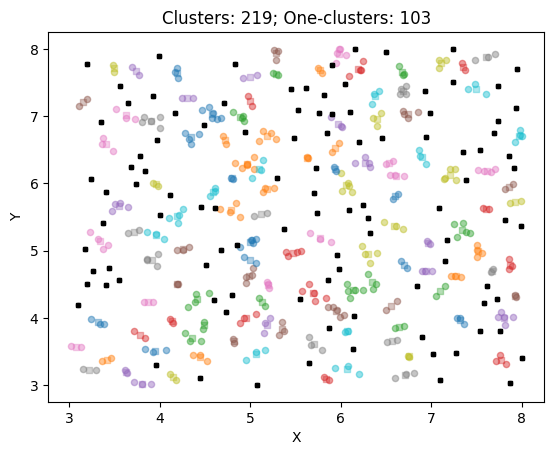

In [119]:
from IPython.display import clear_output

P_FULL_LIST = P_FULL.tolist()


def CalculateMaxes(points: np.ndarray, claster_max_radius: float = CLUSTER_MAX_RADIUS) -> set:
    points_info = []
    m = 0
    for p in points:
        ps = []
        for p1 in points:
            distance = np.sqrt((p[0] - p1[0])**2 + (p[1] - p1[1])**2)
            if (distance > 0 and distance <= claster_max_radius):
                ps.append(p1)
        lps = len(ps)
        if (lps > 0):
            points_info.append((p, lps))
        if (lps > m):
            m = lps
    if (len(points_info) > 1):
        for pi in points_info:
            if (pi[1] == m):
                return pi[0]
    return points[0]


clusters_counter = 0
oneclusters_counter = 0
radius = CLUSTER_MAX_RADIUS

while (len(P_FULL_LIST) > 0):
    mp = CalculateMaxes(P_FULL_LIST, radius)
    c = Cluster2D(radius, mp, P_FULL_LIST)
    c.K_Means()
    x, y = [], []
    for p in c.Points:
        P_FULL_LIST.remove(p)
        x.append(p[0])
        y.append(p[1])
    lp = len(c.Points)
    info = [25, 0.35, None, 20] if lp > 1 else [10, 1.0, 'black', 10]
    centroid_color = plt.scatter(
        c.Centroid[0], c.Centroid[1], info[0], info[2], marker='s', alpha=info[1]).get_edgecolor()
    plt.scatter(x, y, info[3], c=centroid_color, alpha=0.45)
    clusters_counter += 1
    if (lp == 1):
        oneclusters_counter += 1
    clear_output()
    print(len(P_FULL_LIST))


plt.title(f'Clusters: {clusters_counter}; One-clusters: {oneclusters_counter}')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()
